## Solutions for the Problem Set 1, Microeconometrics.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np 
import scipy.stats

## Task A.1
*Open a Jupyter Notebook and import the data set nhis-initial.xslx |we recommend using the software presented in class (e.g. pandas, matplotlib, etc.). Try to think of ways to answer the following questions: Are there more females or males? Are there more inidividuals who hold a degree or not?*

In [10]:
df = pd.read_excel ('data/nhis-initial.xlsx')

In [9]:
df.head()

,sex,age,education,hours,earnings,hospitalized,health
0,Female,34,Never attended,45,Low,0,4
1,Male,49,High school,32,Low,0,3
2,Male,29,Associate degree,25,Middle,0,4
3,Female,47,Bachelor,40,Middle,0,5
4,Male,31,Master,40,Middle,0,5


In [7]:
#obtain average age
print('Average age in the sample is {:.0f}'.format(df["age"].mean()))

Average age in the sample is 44


In [8]:
#obtain averages of working hours per week
print('Average of working hours per week in the sample is {:.0f}'.format(df["hours"].mean()))

Average of working hours per week in the sample is 40


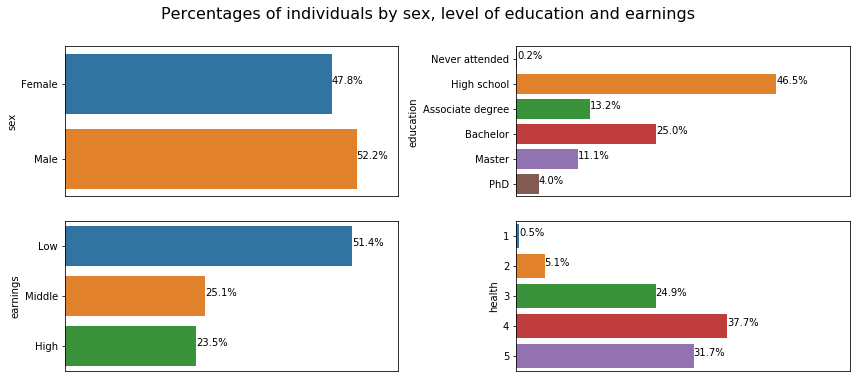

In [9]:
# obtain percentages of individuals by sex, level of education and earnings
fig, axes = plt.subplots(2,2, figsize=(12,5))
fig.suptitle('Percentages of individuals by sex, level of education and earnings', fontsize=16, y=1.08)
df1 = df[['sex', 'education', 'earnings', 'health']]
for ax, column in zip(axes.flatten(), df1):
    sns.countplot(y=column, data=df1, ax=ax)
    for p in ax.patches:
        total = len(df1[column])
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
        ax.set_xlabel(' ')
        ax.set_xticks([]) 
        ax.set_xlim([0, 16000])
fig.tight_layout() 

*Now try to relate individual characteristics to the hospitalization status. Are high or low earners/old or young people more often hospitalized?*

In [10]:
#obtain average age by hospitalization status
print('Average age of hospitalized individuals is {:.0f}'.format(df.loc[df['hospitalized'] == 1, 'age'].mean()))
print('Average age of not hospitalized individuals is {:.0f}'.format(df.loc[df['hospitalized'] == 0, 'age'].mean()))

Average age of hospitalized individuals is 46
Average age of not hospitalized individuals is 43


In [11]:
#obtain average of working hours per week by hospitalization status
print('Average of working hours of hospitalized individuals is {:.0f}'.format(df.loc[df['hospitalized'] == 1, 'hours'].mean()))
print('Average of working hours of not hospitalized individuals is {:.0f}'.format(df.loc[df['hospitalized'] == 0, 'hours'].mean()))

Average of working hours of hospitalized individuals is 39
Average of working hours of not hospitalized individuals is 41


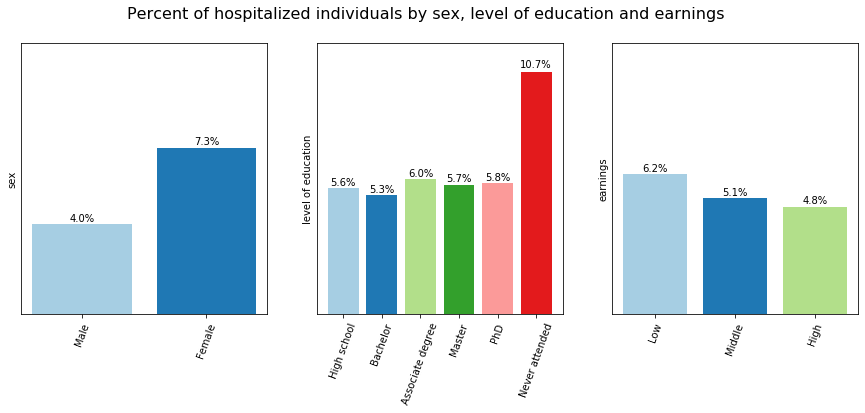

In [12]:
# obtain percentages of hospitalized individuals by sex, level of education and earnings
df_hosp = df.query('hospitalized==1')
gbl = globals()
df_fix = df[['sex', 'education', 'earnings']]
for column in df_fix:
    gbl['df_'+ column] = pd.merge(df[column].value_counts().to_frame().reset_index(), 
                                  df_hosp[column].value_counts().to_frame().reset_index(), on='index')
    gbl['df_'+ column]['percent'] = gbl['df_'+ column].iloc[:,2] * 100 / gbl['df_'+ column].iloc[:,1]
fig, axes = plt.subplots(1,3, figsize=(15,5))
fig.suptitle('Percent of hospitalized individuals by sex, level of education and earnings', fontsize=16)
y_labels = ['sex', 'level of education', 'earnings']
for ax, frame, i in zip(axes.flatten(), [df_sex, df_education, df_earnings], y_labels):
    bars = ax.bar(frame['index'], frame['percent'], color=plt.cm.Paired(np.arange(len(frame))))
    plt.draw()
    ax.set_xticklabels(ax.get_xticklabels(), rotation=70)
    ax.set_ylabel(i)
    ax.set_ylim([0, 12])
    ax.set_yticks([])
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., 1.01*height, '{:.1f}%'.format(height), ha='center', va='bottom') 

## Task A.2

*Compute the average health status of hospitalized and nonhospitalized individuals. Who is healthier on average? What could be a reason for this bias?*

In [22]:
pd.options.display.float_format = '{:,.1f}'.format
df.groupby('hospitalized')['health'].mean().to_frame()

,health
hospitalized,
0,4.0
1,3.6


**Potential reason for the bias could be that individuals who are healthier are hospitalized less often than individuals who have worse health.**

## Task A.3

*Adjust the data set for the POM framework (as seen in the lecture), with health status as the outcome and hospitalization as the treatment status (Hint: rename and drop columns of the data frame).*

In [149]:
is_treated = df['hospitalized'] == 1

df['Y'] = df['health']
df['Y_0'] = df.loc[~is_treated, 'health']
df['Y_1'] = df.loc[is_treated, 'health']

df['D'] = np.nan
df.loc[~is_treated, 'D'] = 0
df.loc[is_treated, 'D'] = 1
pd.options.display.float_format = '{:,.0f}'.format
df.head()

,sex,age,education,hours,earnings,hospitalized,health,Y,Y_0,Y_1,D
0,Female,34,Never attended,45,Low,0,4,4,4,nan,0
1,Male,49,High school,32,Low,0,3,3,3,nan,0
2,Male,29,Associate degree,25,Middle,0,4,4,4,nan,0
3,Female,47,Bachelor,40,Middle,0,5,5,5,nan,0
4,Male,31,Master,40,Middle,0,5,5,5,nan,0


# Task A.4

*Compute the naive estimate for the average treatment effect (ATE).*

Later in B3

## Task B.1

*As we've seen in the lecture, in reality, we can only ever observe one counterfactual; however, when simulating data, we can bypass this problem. The (simulated) data set nhis-simulated.xslx contains counterfactual outcomes, i.e., outcomes under control for individuals assigned to the treatment group and vice versa. Derive and compute the average outcomes in the two observable and two unobservables states; Design them in a similar way as Table 2.3 in Morgan & Winship (2014)*

In [150]:
#simulate the data with E_Y1_D0 = 4.9 and E_Y0_D1 = 3.9
lower = 1
upper = 5
mu01 = 4.9
mu10 = 3.9
sigma = 0.1
N01 = df['Y_1'].isna().sum()
N10 = df['Y_0'].isna().sum()
df.loc[df['D'] == 0, 'Y_1'] = scipy.stats.truncnorm.rvs(
          (lower-mu01)/sigma,(upper-mu01)/sigma,loc=mu01,scale=sigma,size=N01)
df.loc[df['D'] == 1, 'Y_0'] = scipy.stats.truncnorm.rvs(
          (lower-mu10)/sigma,(upper-mu10)/sigma,loc=mu10,scale=sigma,size=N10)
df.head()

,sex,age,education,hours,earnings,hospitalized,health,Y,Y_0,Y_1,D
0,Female,34,Never attended,45,Low,0,4,4,4,5,0
1,Male,49,High school,32,Low,0,3,3,3,5,0
2,Male,29,Associate degree,25,Middle,0,4,4,4,5,0
3,Female,47,Bachelor,40,Middle,0,5,5,5,5,0
4,Male,31,Master,40,Middle,0,5,5,5,5,0


In [207]:
E_Y1_D1 = df.loc[df['D'] == 1, 'Y_1'].mean()
E_Y1_D0 = df.loc[df['D'] == 0, 'Y_1'].mean()
E_Y0_D1 = df.loc[df['D'] == 1, 'Y_0'].mean()
E_Y0_D0 = df.loc[df['D'] == 0, 'Y_0'].mean()
table = pd.DataFrame({'Group': ['Treatment group(D = 1)', 'Control group(D = 0)'], 
                      'E[Y_1|.]': [E_Y1_D1, E_Y1_D0], 'E[Y_0|.]': [E_Y0_D1, E_Y0_D0]})
pd.options.display.float_format = '{:,.1f}'.format
table

,Group,E[Y_1|.],E[Y_0|.]
0,Treatment group(D = 1),3.6,3.9
1,Control group(D = 0),4.9,4.0


## Task B.2 

*From here on we assume that 5% of the population take the treatment.*

*Derive and explain formula 2.12 from Morgan & Winship (2014) for the naive estimator as a decomposition of true ATE, baseline bias, and differential treatment fect bias (do this with pen and paper).*

Considering the proportion of the population assigned to the treatment, the ATE is decomposed as (2.8): 

$$E[\delta] = \{\pi E[Y^1|D=1] + (1 - \pi)E[Y^1|D=0]\} - \{\pi E[Y^0|D=1] + (1 - \pi)E[Y^0|D=0]\}$$

Rearranging the terms:

$$E[Y^1|D=1] - E[Y^0|D=0] = E[\delta] + E[Y^1|D=1] - \pi E[Y^1|D=1] - E[Y^1|D=0] + \pi E[Y^1|D=0] + \pi E[Y^0|D=1] - \pi E[Y^0|D=0]$$

Equivalently:

$$E[Y^1|D=1] - E[Y^0|D=0] = E[\delta]$$
$$+ \{E[Y^0|D=1] - \pi E[Y^0|D=0]\}$$
$$+ \{(1-\pi)[(E[Y^1|D=1]) - E[Y^0|D=1]) - (E[Y^1|D=0]  - E[Y^0|D=0)]\}$$

Or (2.12):

$$E[Y^1|D=1] - E[Y^0|D=0] = E[\delta]$$
$$+ \{E[Y^0|D=1] - E[Y^0|D=0]\}$$
$$+ \{(1-\pi)[(E[\delta|D=1]) - (E[\delta|D=0)]\},$$

where the first line represents true ATE, the second - baseline bias, and the third - differential treatment bias.

## Task B.3

*Calculate the baseline bias and differential treatment effect bias. How could we interpret these biases in our framework of health status of hospitalized and non-hospitalized respondents? Compute the naive estimate and true value of the ATE for the simulated data. Is the naive estimator upwardly or downwardly biased?*

In [219]:
pi = 0.05
baseline_bias = E_Y0_D1 - E_Y0_D0
differential_bias = (1-pi)*((E_Y1_D1 - E_Y0_D1) - (E_Y1_D0 - E_Y0_D0))
naive = E_Y1_D1 - E_Y0_D0
true_ate = naive - (baseline_bias + differential_bias)
print('Baseline bias is {:.1f}'.format(baseline_bias))
print('Differential treatment effect bias is {:.1f}'.format(differential_bias))
print('Naive estimator is {:.1f}'.format(naive))
print('True ATE is {:.1f}'.format(true_ate))

Baseline bias is -0.1
Differential treatment effect bias is -1.2
Naive estimator is -0.4
True ATE is 0.9


Interpretation: 

**Baseline base** tells us that those who have been hospitalized would have had worse health (3.9) than those who were not (4.0) in the counterfactual state in which they were not in fact hospitalized. One possible explanation could be that these hospitalized individuals in the counterfactual state could have been exposed to the the diseases from the other patients and, therefore, their health could have worsened.

**Negative differential treatment effect bias** comes from the fact that hospitalized individuals who have sought medical care are not as healthy, on average, as those who never get hospitalized in the first place. 

Therefore, we can conclude that **naive estimator is downwardly biased**: both negative baseline and differential treatment effect biases outpace the true positive ATE from hospitals.

## Task B.4 

*Which assumptions must hold (on the data) such that the naive estimator is an unbiased and consistent estimator for the ATE?*

SUTVA: independence assumption $(Y^0, Y^1) \parallel D$ should hold. In other words, $E[Y^1|D=1]  = E[Y^1|D=0]$ and $E[Y^0|D=1] = E[Y^0|D=0]$ guarantee that treatment indicator is independent of the potential outcomes.